In [101]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1> Support Vector Machine (SVM)</h1><br>
Use an SVM-based model to predict the Portuguese outcome of the battle from the number of ships involved on all sides and Spanish involvement.

In [253]:
armada = pd.read_csv("/Users/jennyskytta/Downloads/armada.dat", sep=r"\s\s+", engine="python", header=None, names = ["battle", "year", "ptships", "enships",
                              "nlships", "ratio", "span_invol",
                              "outcome"])
armada.shape  #uses regular expressions  / regex 

(28, 8)

### EDA: Exploratory Data Analysis 

In [5]:
armada.sample(5)

,battle,year,ptships,enships,nlships,ratio,span_invol,outcome
1,Malacca Strait,1606,14,11,0,1.273,0,0
18,Bahia,1627,4,10,0,0.400,1,-1
12,Goa,1638,6,8,0,0.750,0,1
23,Dunas,1639,38,110,0,0.345,1,-1
14,Goa,1658,9,9,0,1.000,0,0


In [154]:
span_inv = armada.groupby('span_invol')
armada2 = span_inv.sum()
armada2

,year,ptships,enships,nlships,ratio,outcome
span_invol,,,,,,
0,24361,96,76,19,16.459,-1
1,21234,272,300,31,16.018,-4


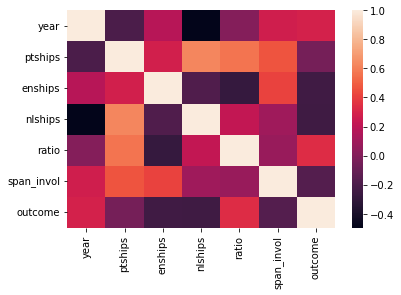

In [244]:
sns.heatmap(armada.corr())
plt.show()

<h3>Linear Regression model</h3>
Created a linear regression model as baseline regarding coefficients 

In [256]:
from sklearn.linear_model import LogisticRegression

X = armada[['ptships', 'enships', 'nlships']]
y = armada['outcome']

lr = LogisticRegression()
_ = lr.fit(X, y)
lr.score(X, y) 

0.5714285714285714

<h3>SVC</h3>
Started the SVC model to assess accuracy and compare to the LR model

In [212]:
from sklearn.svm import SVC

X = armada[['ptships', 'enships', 'nlships']]
y = armada['outcome']

m = SVC(kernel="linear")
_ = m.fit(X, y)
m.score(X, y)

0.5357142857142857

In [220]:
from sklearn.model_selection import train_test_split

Xt, Xv, yt, yv = train_test_split(X, y)
m.fit(Xt, yt)
m.score(Xv, yv)

0.5714285714285714

In [221]:
from sklearn.metrics import classification_report

predictions = m.predict(Xt)
print(classification_report(yt,predictions))

              precision    recall  f1-score   support

          -1       1.00      0.29      0.44         7
           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         4

    accuracy                           0.57        21
   macro avg       0.51      0.43      0.38        21
weighted avg       0.58      0.57      0.48        21



/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<hr>I am inspecting the best parameters found sklearn GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [222]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [188]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [223]:
grid.fit(Xt,yt)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.200 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.250 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.250 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=100, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [224]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [225]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [226]:
grid_pred = grid.predict(Xt)

In [227]:
print(classification_report(yt,grid_pred))

              precision    recall  f1-score   support

          -1       1.00      0.29      0.44         7
           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         4

    accuracy                           0.57        21
   macro avg       0.51      0.43      0.38        21
weighted avg       0.58      0.57      0.48        21



/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall accuracy of the SVC model resulted in low accuracy.  Based on the visualization heatmap, this isn't terribly surprising that we get 57% accuracy with our model.

## Try solving the same problem using two other classifiers that you know.
<br>
<h3>Naive Bayes</h3>

Report and compare their results with those from SVM.

In [236]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB(alpha=0) #setting at zero to purposely demonstrate improvement
NB.fit(Xt, yt)
NBpred = NB.predict(Xv)
print(classification_report(yv, NBpred)) 

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.00      0.00      0.00         3
           1       0.14      1.00      0.25         1

    accuracy                           0.14         7
   macro avg       0.05      0.33      0.08         7
weighted avg       0.02      0.14      0.04         7



/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-sc

<hr>The Naive Bayes model performed horribly on data which isn't surprising given how small the dataset is and that Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.  This algorithm is also better suited for categorical input variables than numerical variables.

<h3>kNN</h3>

In [249]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(8)  
knn.fit(Xt,yt)  
knn.score(Xv,yv)

0.7142857142857143

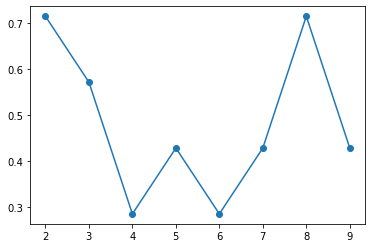

In [247]:
accuracies = []
for k in range(2,10):
    knn = KNeighborsClassifier(k)
    knn.fit(Xt, yt)
    accuracies.append(knn.score(Xv, yv))

_ = plt.plot(range(2,10), accuracies, marker="o")

In [251]:
knnpred = knn.predict(Xv)
print(classification_report(yv, knnpred)) 

              precision    recall  f1-score   support

          -1       1.00      0.67      0.80         3
           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.53      0.56      0.52         7
weighted avg       0.69      0.71      0.66         7



/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maybe somewhat unsurprising, the kNN model performed well with a k of 8.  In terms of overall value with this predictive model, but its hard to draw strong conclusions given how small the dataset is, how knn is sensitive to noisy data.  Personally, I would default to utilizing logistic regression model with these data.  

<h3>Report and compare their results with those from SVM.</h3>

SVM works well with high dimension, small, clean data sets which this one doesn't appear to fulfill. Overall, SVM had similar predictive accuracy as logistic regression which was somewhat reassuring.  Naive Bayes did absolutely horrid for this data but honestly that makes sense as well as I don't think I would typically choose that model for these data.  I was mostly curious to see how it would perform.  The kNN model did the best but considering what is assessing, I don't feel that the model fits for these data.  There's a lot of noise and the data may appear to be "near" eachother.  In conclusion, these data aren't great for making predictions.  It might be more accurate had I chosen to use Random Forest modeling.  